In [1]:
#BIG_TEST
#X類別化,分別預測Y
#模型一隨機森林

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
sns.set_theme(style="ticks", color_codes=True)
from tqdm.notebook import tqdm, trange
import time

In [3]:
data=pd.read_excel("BIGGAUSS_X+Y_0721.xlsx")

In [4]:
data

,球號,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,特號,和值,均值,首尾差,尾數和,首數和,實際Y球號,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,5,37,41,42,46,49,18,220,36,44,30,19,8,13,17,20,43,48
1,8,13,17,20,43,48,38,149,24,40,29,12,4,18,24,26,43,47
2,4,18,24,26,43,47,33,162,27,43,32,13,1,10,20,28,37,44
3,1,10,20,28,37,44,33,140,23,43,20,12,3,4,8,11,42,44
4,3,4,8,11,42,44,21,112,18,41,22,9,15,29,31,33,41,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,13,24,30,37,43,44,4,191,31,31,21,17,6,22,26,29,32,43
292,6,22,26,29,32,43,38,158,26,37,28,13,6,12,15,16,24,41
293,6,12,15,16,24,41,21,114,19,35,24,9,3,6,15,21,24,33
294,3,6,15,21,24,33,14,102,17,30,22,8,10,21,26,34,48,49


In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
train

,球號,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,特號,和值,均值,首尾差,尾數和,首數和,實際Y球號,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
63,3,13,24,26,27,29,9,122,20,26,32,9,9,14,17,23,33,48
17,4,8,10,18,33,40,2,113,18,36,23,9,1,9,11,12,37,46
215,10,17,27,37,44,45,22,180,30,35,30,15,5,13,18,24,27,48
219,8,22,28,40,41,45,34,184,30,37,24,16,10,15,27,32,39,42
183,12,18,19,21,33,37,15,140,23,25,30,11,2,26,28,29,37,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,7,11,16,18,31,24,84,14,30,24,6,3,4,10,21,28,41
71,3,4,15,29,32,39,38,122,20,36,32,9,1,3,16,17,24,25
106,19,21,30,43,44,48,8,205,34,29,25,18,3,15,21,24,27,40
270,10,22,23,35,46,49,2,185,30,39,25,16,6,8,10,28,41,43


In [10]:
X_train = train.iloc[:, :12]
Y_train = train.iloc[:, -6:]
X_test = test.iloc[:, :12]
Y_test = test.iloc[:, -6:]

In [11]:

X_train

,球號,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,特號,和值,均值,首尾差,尾數和,首數和
63,3,13,24,26,27,29,9,122,20,26,32,9
17,4,8,10,18,33,40,2,113,18,36,23,9
215,10,17,27,37,44,45,22,180,30,35,30,15
219,8,22,28,40,41,45,34,184,30,37,24,16
183,12,18,19,21,33,37,15,140,23,25,30,11
...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,7,11,16,18,31,24,84,14,30,24,6
71,3,4,15,29,32,39,38,122,20,36,32,9
106,19,21,30,43,44,48,8,205,34,29,25,18
270,10,22,23,35,46,49,2,185,30,39,25,16


In [12]:
Y_train

,實際Y球號,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
63,9,14,17,23,33,48
17,1,9,11,12,37,46
215,5,13,18,24,27,48
219,10,15,27,32,39,42
183,2,26,28,29,37,48
...,...,...,...,...,...,...
188,3,4,10,21,28,41
71,1,3,16,17,24,25
106,3,15,21,24,27,40
270,6,8,10,28,41,43


In [13]:
Y_test

,實際Y球號,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
274,8,9,14,37,42,46
155,12,31,32,42,43,49
84,4,10,21,30,39,42
82,7,12,18,35,37,45
261,6,7,10,24,29,40
9,5,9,19,31,33,35
42,4,14,22,42,46,47
277,2,7,9,18,20,48
282,5,6,9,29,43,45
92,8,13,25,27,38,46


In [14]:
# 修改超參數部分max_features{3,5,6,8,10,15},min_samples_split={5,10},min_samples_leaf={0,1,3,5},max_depth={5,10,20,50}
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

import statsmodels.api as sm
import numpy as np
# rforest = RandomForestRegressor(n_estimators=100, min_samples_split=10, random_state=0)#原始保留
# for j in {3,5,6,8,10,15}:
#     print(j)
rforest = RandomForestRegressor(n_estimators=300,max_features=8, min_samples_split=3, random_state=0)
multi_output_rforest = MultiOutputRegressor(rforest)

multi_output_rforest.fit(X_train, Y_train)

Y_test_array = np.array(Y_test)

# 迴圈處理每個目標變數
for i in range(Y_test_array.shape[1]):
    # 使用X_test測試集預測predictions
    predictions = multi_output_rforest.predict(X_test)

    # 計算R Square
    X_addC = sm.add_constant(predictions[:, i])
    result = sm.OLS(Y_test_array[:, i], X_addC).fit()
    print(f"Target Variable {i+1}:")
    print("R-squared:", result.rsquared)
    print("Adjusted R-squared:", result.rsquared_adj)
    print()
predictions

Target Variable 1:
R-squared: 0.041725942990053944
Adjusted R-squared: 0.025203976489882485

Target Variable 2:
R-squared: 0.03671783626133773
Adjusted R-squared: 0.020109523093429837

Target Variable 3:
R-squared: 0.0018204600812686822
Adjusted R-squared: -0.015389531986295557

Target Variable 4:
R-squared: 0.020663902551781854
Adjusted R-squared: 0.0037787974233643995

Target Variable 5:
R-squared: 0.09360507421388953
Adjusted R-squared: 0.07797757549343942

Target Variable 6:
R-squared: 0.009507749308895419
Adjusted R-squared: -0.007569703289227014



array([[ 6.46033333, 12.94511111, 17.76222884, 21.08263889, 35.3385    ,
        41.71315873],
       [ 8.17455556, 15.757     , 19.40342063, 28.06755556, 38.7505873 ,
        44.75038889],
       [ 8.48612698, 14.74563889, 21.40553968, 27.00389683, 34.3191746 ,
        43.42180952],
       [ 7.39555026, 16.02074471, 26.54270106, 29.69437037, 36.97785979,
        40.51036772],
       [ 4.9048254 , 12.1772619 , 18.93765873, 27.89211905, 35.50965079,
        38.55775397],
       [ 5.87622222, 12.82651852, 18.372     , 23.23335714, 36.08629365,
        42.04703704],
       [ 5.8776746 , 13.0431746 , 21.62400794, 28.11522222, 34.42288889,
        40.13839683],
       [13.02570635, 17.56719841, 21.56569048, 28.52420635, 39.77494444,
        43.39742063],
       [ 4.85944444, 11.34260317, 21.88956349, 27.24511111, 35.84749206,
        42.78894444],
       [ 9.12157143, 17.36967725, 23.11465079, 31.50211111, 35.28677778,
        41.35415079],
       [ 6.78801587, 13.69766667, 21.86516667, 27.

In [19]:
today_data = pd.DataFrame({
    '球號': [10],
    'Unnamed: 1': [15],
    'Unnamed: 2': [17],
    'Unnamed: 3': [33],
    'Unnamed: 4': [34],
    'Unnamed: 5': [45],
    '特號': [36],
    '和值': [154],
    '均值': [25],
    '首尾差': [35],
    '尾數和': [24],
    '首數和': [13]
})
# 球號	Unnamed: 1	Unnamed: 2	Unnamed: 3	Unnamed: 4	Unnamed: 5	特號	和值	均值	首尾差	尾數和	首數和
# 63	3	13	24	26	27	29	9	122	20	26	32	9

In [16]:
X_train

,球號,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,特號,和值,均值,首尾差,尾數和,首數和
63,3,13,24,26,27,29,9,122,20,26,32,9
17,4,8,10,18,33,40,2,113,18,36,23,9
215,10,17,27,37,44,45,22,180,30,35,30,15
219,8,22,28,40,41,45,34,184,30,37,24,16
183,12,18,19,21,33,37,15,140,23,25,30,11
...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,7,11,16,18,31,24,84,14,30,24,6
71,3,4,15,29,32,39,38,122,20,36,32,9
106,19,21,30,43,44,48,8,205,34,29,25,18
270,10,22,23,35,46,49,2,185,30,39,25,16


In [18]:
print("模型训练时的特征名:", multi_output_rforest.feature_names_in_)
print("今天数据的列名:", today_data.columns)

模型训练时的特征名: ['球號' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4' 'Unnamed: 5'
 '特號' '和值' '均值' '首尾差' '尾數和' '首數和']
今天数据的列名: Index(['球號', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', '特號', '和值', '均值', '首尾差', '尾數和', '首數和'],
      dtype='object')


In [20]:
predictions_test = multi_output_rforest.predict(today_data)
predictions_test

array([[ 6.92729365, 13.95604762, 20.34866667, 26.95583333, 35.63486905,
        40.21192063]])

In [22]:
data_0718 = pd.DataFrame({
    '球號': [4],
    'Unnamed: 1': [5],
    'Unnamed: 2': [16],
    'Unnamed: 3': [19],
    'Unnamed: 4': [34],
    'Unnamed: 5': [40],
    '特號': [10],
    '和值': [118],
    '均值': [19],
    '首尾差': [36],
    '尾數和': [28],
    '首數和': [9]
})

In [23]:
predictions_test_0721 = multi_output_rforest.predict(data_0718)
predictions_test_0721

array([[ 3.2329127 , 11.76811111, 18.65716667, 25.54275397, 33.2584127 ,
        40.28270635]])

C:\Users\student\anaconda3\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\student\anaconda3\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\student\anaconda3\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\student\anaconda3\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\student\anaconda3\lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  ann.update_bbox_position_size(rende

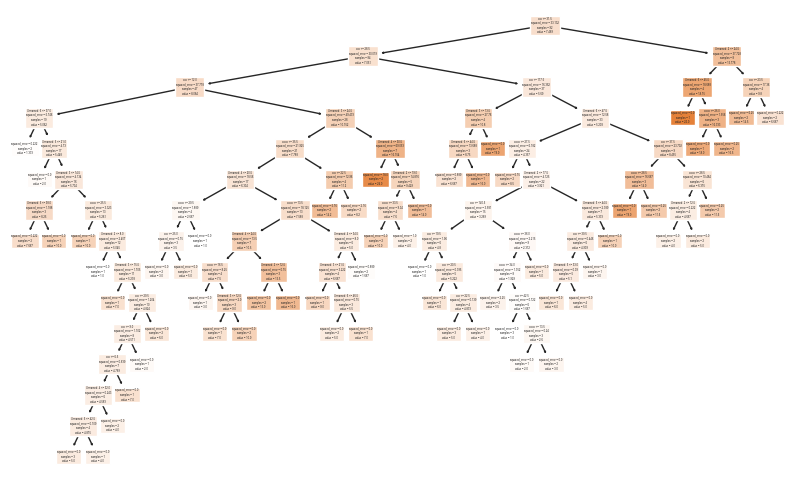

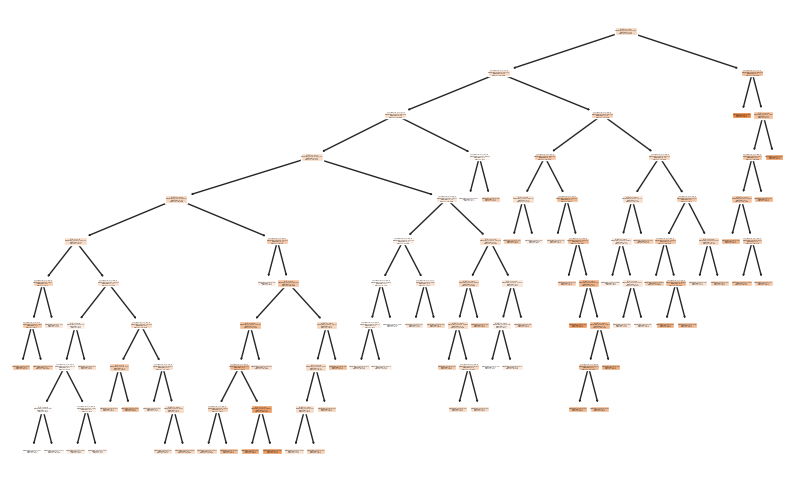

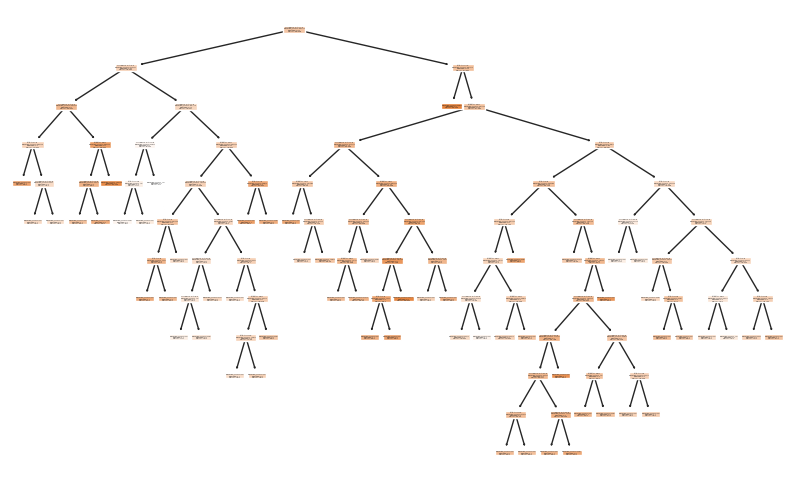

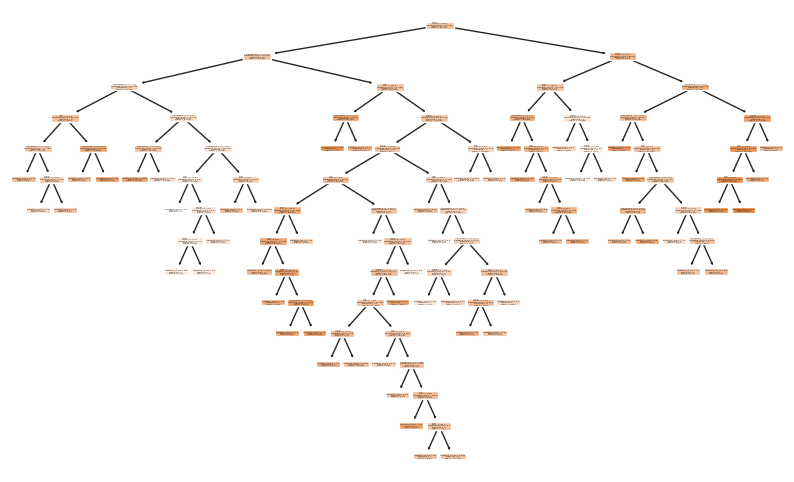

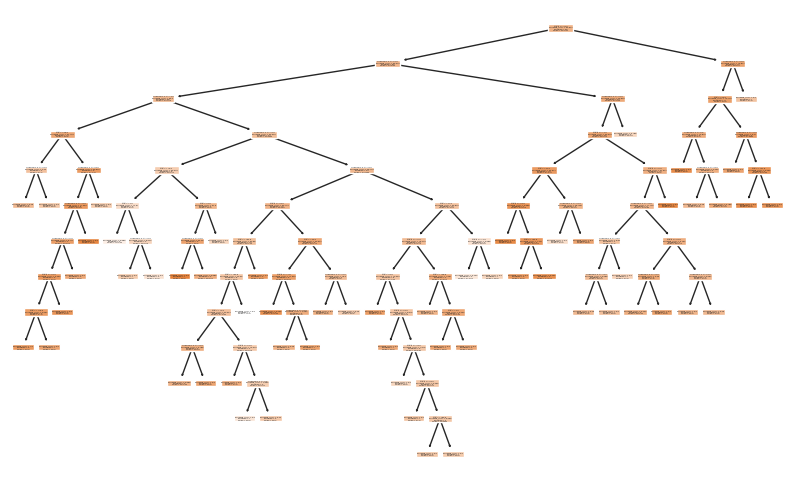

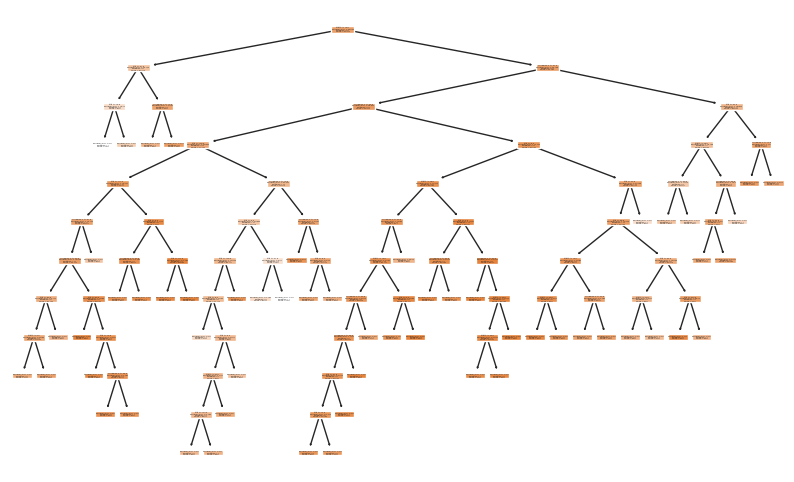

In [128]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get all decision trees from the random forest model
estimators = multi_output_rforest.estimators_

# Plot the decision tree for each tree in the random forest
for i, tree in enumerate(estimators):
    plt.figure(figsize=(10, 6))
    plt.title(f"Decision Tree {i+1}")
    plot_tree(tree.estimators_[0], feature_names=X_train.columns, filled=True)  # Plot the first estimator
    plt.show()


In [25]:
#樹狀不適合轉單熱,進入深度學習再轉單熱
X_train_onehot = pd.get_dummies(X_train, columns=["球號", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5","特號"])
X_train_onehot


,和值,均值,首尾差,尾數和,首數和,球號_1,球號_2,球號_3,球號_4,球號_5,...,特號_40,特號_41,特號_42,特號_43,特號_44,特號_45,特號_46,特號_47,特號_48,特號_49
63,122,20,26,32,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17,113,18,36,23,9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
215,180,30,35,30,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,184,30,37,24,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,140,23,25,30,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,84,14,30,24,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,122,20,36,32,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
106,205,34,29,25,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,185,30,39,25,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_test_onehot = pd.get_dummies(X_test, columns=["球號", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5","特號"])

In [27]:
X_test_onehot = X_test_onehot.reindex(columns=X_train_onehot.columns, fill_value=0)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [29]:
model = Sequential()

In [30]:
# 定义模型
model.add(Dense(128, activation='relu', input_shape=(X_train_onehot.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6) )

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               30592     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
Total params: 45,286
Trainable params: 45,286
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 编译模型
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

# 训练模型
model.fit(X_train_onehot, Y_train, epochs=300, batch_size=32)

Epoch 1/300
8/8 [==============================] - 2s 6ms/step - loss: 716.6448 - mae: 22.7930
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 449.6419 - mae: 17.8648
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 229.0899 - mae: 12.6626
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 125.5850 - mae: 8.6707
Epoch 5/300
8/8 [==============================] - 0s 6ms/step - loss: 83.2691 - mae: 7.1804
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 74.1099 - mae: 6.9071
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 70.8813 - mae: 6.7302
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 68.7219 - mae: 6.6322
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 68.2888 - mae: 6.6184
Epoch 10/300
8/8 [==============================] - 0s 4ms/step - loss: 66.2722 - mae: 6.5263
Epoch 11/300
8/8 [==============================] - 0s 4ms/ste

8/8 [==============================] - 0s 3ms/step - loss: 26.3602 - mae: 4.1477
Epoch 89/300
8/8 [==============================] - 0s 3ms/step - loss: 26.0934 - mae: 4.0942
Epoch 90/300
8/8 [==============================] - 0s 3ms/step - loss: 26.0653 - mae: 4.0899
Epoch 91/300
8/8 [==============================] - 0s 3ms/step - loss: 26.6073 - mae: 4.1464
Epoch 92/300
8/8 [==============================] - 0s 3ms/step - loss: 26.8157 - mae: 4.1526
Epoch 93/300
8/8 [==============================] - 0s 3ms/step - loss: 25.0897 - mae: 4.0295
Epoch 94/300
8/8 [==============================] - 0s 3ms/step - loss: 25.0300 - mae: 4.0155
Epoch 95/300
8/8 [==============================] - 0s 3ms/step - loss: 25.1555 - mae: 4.0259
Epoch 96/300
8/8 [==============================] - 0s 3ms/step - loss: 24.8590 - mae: 4.0057
Epoch 97/300
8/8 [==============================] - 0s 3ms/step - loss: 24.7805 - mae: 3.9862
Epoch 98/300
8/8 [==============================] - 0s 4ms/step - loss: 2

8/8 [==============================] - 0s 3ms/step - loss: 17.7455 - mae: 3.3350
Epoch 175/300
8/8 [==============================] - 0s 3ms/step - loss: 17.4101 - mae: 3.3015
Epoch 176/300
8/8 [==============================] - 0s 4ms/step - loss: 16.6769 - mae: 3.2363
Epoch 177/300
8/8 [==============================] - 0s 3ms/step - loss: 16.7952 - mae: 3.2385
Epoch 178/300
8/8 [==============================] - 0s 3ms/step - loss: 16.8475 - mae: 3.2294
Epoch 179/300
8/8 [==============================] - 0s 3ms/step - loss: 16.3800 - mae: 3.1968
Epoch 180/300
8/8 [==============================] - 0s 3ms/step - loss: 16.1650 - mae: 3.1742
Epoch 181/300
8/8 [==============================] - 0s 3ms/step - loss: 16.1009 - mae: 3.1631
Epoch 182/300
8/8 [==============================] - 0s 3ms/step - loss: 16.4100 - mae: 3.1978
Epoch 183/300
8/8 [==============================] - 0s 3ms/step - loss: 16.3797 - mae: 3.1831
Epoch 184/300
8/8 [==============================] - 0s 3ms/step

8/8 [==============================] - 0s 3ms/step - loss: 11.5147 - mae: 2.6427
Epoch 261/300
8/8 [==============================] - 0s 3ms/step - loss: 11.2497 - mae: 2.6119
Epoch 262/300
8/8 [==============================] - 0s 3ms/step - loss: 11.0757 - mae: 2.5948
Epoch 263/300
8/8 [==============================] - 0s 3ms/step - loss: 11.4746 - mae: 2.6472
Epoch 264/300
8/8 [==============================] - 0s 3ms/step - loss: 11.2312 - mae: 2.6037
Epoch 265/300
8/8 [==============================] - 0s 3ms/step - loss: 11.6690 - mae: 2.6722
Epoch 266/300
8/8 [==============================] - 0s 3ms/step - loss: 11.2710 - mae: 2.6255
Epoch 267/300
8/8 [==============================] - 0s 3ms/step - loss: 11.1646 - mae: 2.6035
Epoch 268/300
8/8 [==============================] - 0s 3ms/step - loss: 11.3635 - mae: 2.6342
Epoch 269/300
8/8 [==============================] - 0s 3ms/step - loss: 11.1457 - mae: 2.6010
Epoch 270/300
8/8 [==============================] - 0s 3ms/step

In [32]:
# 训练模型
model.fit(X_test_onehot, Y_test, epochs=50, batch_size=32)

Epoch 1/50
2/2 [==============================] - 0s 6ms/step - loss: 62.1124 - mae: 6.4149
Epoch 2/50
2/2 [==============================] - 0s 14ms/step - loss: 64.8495 - mae: 6.3333
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 66.4697 - mae: 6.5402
Epoch 4/50
2/2 [==============================] - 0s 23ms/step - loss: 60.7389 - mae: 6.2987
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 63.9547 - mae: 6.2976
Epoch 6/50
2/2 [==============================] - 0s 10ms/step - loss: 56.6624 - mae: 5.9043
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 57.0243 - mae: 6.1389
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 64.1163 - mae: 6.4784
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 58.6766 - mae: 6.1755
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 51.4918 - mae: 5.6314
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 54.9

In [33]:
predictions_ML =model.predict(X_test_onehot)
predictions_ML

2/2 [==============================] - 0s 2ms/step


array([[ 5.4765043 , 12.352677  , 23.451084  , 33.61465   , 46.213215  ,
        51.818375  ],
       [ 3.5887659 ,  7.4267197 , 12.154666  , 19.904625  , 31.042303  ,
        42.411255  ],
       [ 6.237963  , 12.574419  , 19.60353   , 25.004454  , 31.361914  ,
        36.734844  ],
       [ 6.6968036 , 14.135164  , 24.402428  , 30.98315   , 38.292076  ,
        41.92655   ],
       [12.233341  , 24.309143  , 29.038694  , 35.06335   , 38.512077  ,
        40.999504  ],
       [ 3.0973837 ,  7.585154  , 15.467619  , 22.7035    , 32.07058   ,
        40.569016  ],
       [11.916038  , 24.750568  , 36.34722   , 43.79318   , 49.167152  ,
        49.727726  ],
       [ 9.097196  , 17.635689  , 20.925827  , 29.48357   , 39.127136  ,
        50.209454  ],
       [ 8.328326  , 18.014786  , 30.59024   , 37.454243  , 42.65616   ,
        41.48982   ],
       [10.517295  , 21.669197  , 35.69231   , 42.586586  , 48.98222   ,
        49.684425  ],
       [13.022164  , 25.56276   , 35.717697  , 40.

In [34]:
today_data = pd.DataFrame({
    '球號': [10],
    'Unnamed: 2': [15],
    'Unnamed: 3': [17],
    'Unnamed: 4': [33],
    'Unnamed: 5': [34],
    'Unnamed: 6': [45],
    '特號': [36],
    '和值': [154],
    '均值': [25],
    '首尾差': [35],
    '尾數和': [24],
    '首數和': [13]
})

In [34]:
today_data_onehot = pd.get_dummies(today_data, columns=["球號", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5","特號"])
today_data_onehot

,和值,均值,首尾差,尾數和,首數和,球號_10,Unnamed: 1_15,Unnamed: 2_17,Unnamed: 3_33,Unnamed: 4_34,Unnamed: 5_45,特號_36
0,154,25,35,24,13,1,1,1,1,1,1,1


In [35]:
today_data_onehot = today_data_onehot.reindex(columns=X_train_onehot.columns, fill_value=0)
today_data_onehot

,和值,均值,首尾差,尾數和,首數和,球號_1,球號_2,球號_3,球號_4,球號_5,...,特號_40,特號_41,特號_42,特號_43,特號_44,特號_45,特號_46,特號_47,特號_48,特號_49
0,154,25,35,24,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
P_test =model.predict(today_data_onehot)
P_test

1/1 [==============================] - 0s 24ms/step


array([[ 4.432471,  8.531839, 12.408157, 19.886295, 30.828535, 43.195652]],
      dtype=float32)

In [37]:
new_data_onehot = pd.get_dummies(data_0718, columns=["球號", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5","特號"])
new_data_onehot

,和值,均值,首尾差,尾數和,首數和,球號_4,Unnamed: 1_5,Unnamed: 2_16,Unnamed: 3_19,Unnamed: 4_34,Unnamed: 5_40,特號_10
0,118,19,36,28,9,1,1,1,1,1,1,1


In [38]:
new_data_onehot = new_data_onehot.reindex(columns=X_train_onehot.columns, fill_value=0)
new_data_onehot

,和值,均值,首尾差,尾數和,首數和,球號_1,球號_2,球號_3,球號_4,球號_5,...,特號_40,特號_41,特號_42,特號_43,特號_44,特號_45,特號_46,特號_47,特號_48,特號_49
0,118,19,36,28,9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
P_test =model.predict(new_data_onehot)
P_test

1/1 [==============================] - 0s 17ms/step


array([[ 5.761695, 10.90993 , 11.701264, 18.232689, 26.426653, 38.033855]],
      dtype=float32)

In [46]:
# 训练模型
model.fit(X_test_onehot, Y_test, epochs=50, batch_size=32)

Epoch 1/50
2/2 [==============================] - 0s 5ms/step - loss: 5.1185 - mae: 1.8503
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 5.0845 - mae: 1.8476
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 5.1060 - mae: 1.8580
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 5.1309 - mae: 1.8648
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 5.0785 - mae: 1.8499
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 4.9187 - mae: 1.8241
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 4.9602 - mae: 1.8178
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 5.0106 - mae: 1.8194
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 5.0259 - mae: 1.8209
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 5.1077 - mae: 1.8424
Epoch 11/50
2/2 [==============================] - 0s 5ms/step - loss: 5.0493 - mae: 1.82

In [38]:
# 训练模型
model.fit(X_train_onehot, Y_train, epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 0s 6ms/step - loss: 36.2848 - mae: 4.7529
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 33.2842 - mae: 4.6095
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 30.7233 - mae: 4.4171
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 29.5771 - mae: 4.3165
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 27.5528 - mae: 4.1727
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 26.4557 - mae: 4.0964
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 26.0305 - mae: 4.0494
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 25.3511 - mae: 4.0293
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 25.3151 - mae: 4.0278
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 24.6051 - mae: 3.9550
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 24.4022 